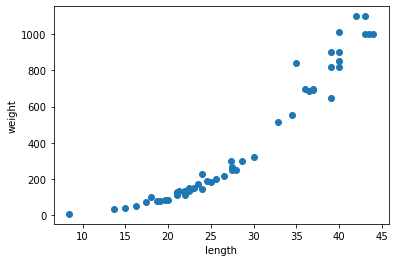

In [1]:
import numpy as np
import matplotlib.pyplot as plt

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [2]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

# KNN

In [3]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.n_neighbors = 3
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [4]:
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


n_neighbors
즉, K값에 따른 모델 변화

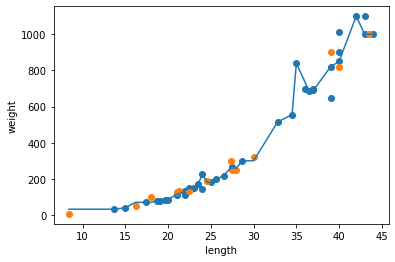

0.991309195814175
[300.]


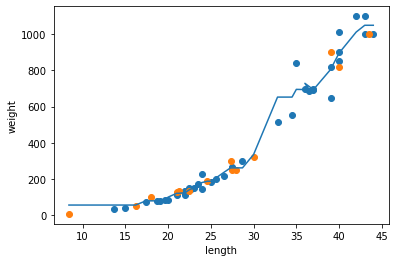

0.9840231023848637
[334.75]


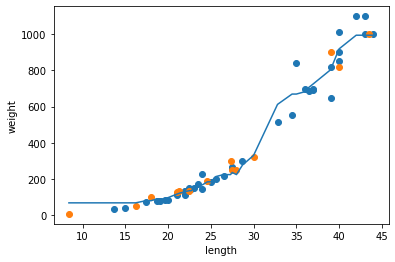

0.9781383949643516
[330.]


In [5]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

for K in range(1,10,3):
  knr = KNeighborsRegressor()
  knr.n_neighbors = K
  knr.fit(train_input, train_target)
  
  perch_length = perch_length.reshape(-1, 1)
  pred = knr.predict(perch_length)

  # print(pred)
  plt.scatter(train_input, train_target)
  plt.scatter(test_input, test_target)
  plt.plot(perch_length, pred)
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()

  print(knr.score(test_input, test_target))
  pred = knr.predict([[30]])
  print(pred)  

# 1차함수 Linear

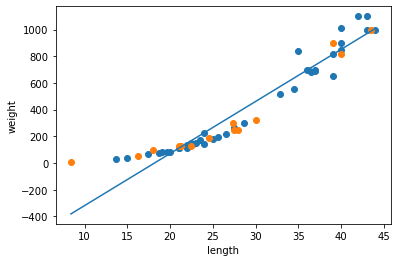

In [6]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)

perch_length = perch_length.reshape(-1, 1)
pred = lr.predict(perch_length)

plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.plot(perch_length, pred)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 2차함수 Linear

0.9775935108325122


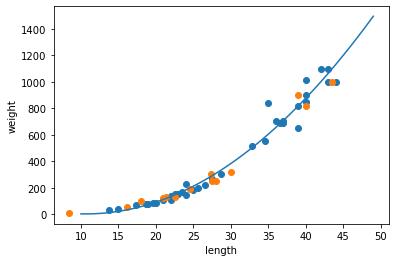

In [7]:
import matplotlib.pyplot as plt
import numpy as np

train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

lr = LinearRegression()
lr.fit(train_poly, train_target)

point = np.arange(10, 50)
print(lr.score(test_poly, test_target))

plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

길이, 높이, 폭까지 썼을 때의 KNN

In [8]:
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()
# print(perch_full)

train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42)

for K in range(1, 10, 3):
  knr = KNeighborsRegressor()
  knr.n_neighbors = K
  knr.fit(train_input, train_target)
  print(knr.score(test_input, test_target))
  pred = knr.predict([[30, 12, 5]])

  print(pred)


0.992281288129551
[514.]
0.9850543937701411
[407.5]
0.9843773065071922
[421.85714286]


길이, 높이, 폭까지 썼을 때의 2차리니어 (미완)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()
print(perch_full)

train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42)

train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

lr = LinearRegression()
lr.fit(train_poly, train_target)


print(lr.score(test_poly, test_target))


[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93